In [102]:
maze_name = 'maze2'

In [103]:
row = 10
column = 10

In [104]:
import random
import queue

#postavke (minimalno 3 x 3)
brojRedaka=row
brojStupaca=column
#*******

class Celija:
  def __init__(self, x, y, posjeceno):
    self.koordinate=(x,y)
    self.posjeceno = posjeceno
    self.susjedi=[]
    self.s=[]

class cell:
  def __init__(self,koordinate,broj):
    self.koordinate=koordinate
    self.broj=broj
  
def generirajCelije(x,y,lista):
  for i in range (0,x):
    for j in range (0,y):
      lista.append(Celija(i,j,False))
  '''
def popuniSusjede(lista):
  for c in range(0,brojRedaka*brojStupaca):
    #***#
    if(lista[c].koordinate[0]==0 and lista[c].koordinate[1]==0):
      lista[c].susjedi.append((0,1))
      lista[c].susjedi.append((1,0))
      #***#
    if(lista[c].koordinate[0]==0 and lista[c].koordinate[1]==brojStupaca-1):
      lista[c].susjedi.append((0,brojStupaca-2))
      lista[c].susjedi.append((1,brojStupaca-1))
      #***#
    if(lista[c].koordinate[0]==brojRedaka-1 and lista[c].koordinate[1]==0):
      lista[c].susjedi.append((brojRedaka-2,0))
      lista[c].susjedi.append((brojRedaka-1,1))
      #***#
    if(lista[c].koordinate[0]==brojRedaka-1 and lista[c].koordinate[1]==brojStupaca-1):
      lista[c].susjedi.append((brojRedaka-2,brojStupaca-1))
      lista[c].susjedi.append((brojRedaka-1,brojStupaca-2))
      #***#
    if(lista[c].koordinate[0]==0 and lista[c].koordinate[1] in range (1,brojStupaca-1)):
      lista[c].susjedi.append((0,lista[c].koordinate[1]-1))
      lista[c].susjedi.append((0,lista[c].koordinate[1]+1))
      lista[c].susjedi.append((1,lista[c].koordinate[1]))
      #***#
    if(lista[c].koordinate[0] in range (1,brojRedaka-1) and lista[c].koordinate[1]==0):
      lista[c].susjedi.append((lista[c].koordinate[0]-1,0))
      lista[c].susjedi.append((lista[c].koordinate[0]+1,0))
      lista[c].susjedi.append((lista[c].koordinate[0],1))
      #***#
    if(lista[c].koordinate[0] in range (1,brojRedaka-1) and lista[c].koordinate[1]==brojStupaca-1):
      lista[c].susjedi.append((lista[c].koordinate[0]-1,brojStupaca-1))
      lista[c].susjedi.append((lista[c].koordinate[0]+1,brojStupaca-1))
      lista[c].susjedi.append((lista[c].koordinate[0],lista[c].koordinate[1]-1))
      #***#
    if(lista[c].koordinate[0]==brojRedaka-1 and lista[c].koordinate[1] in range (1,brojStupaca-1)):
      lista[c].susjedi.append((brojRedaka-1,lista[c].koordinate[1]-1))
      lista[c].susjedi.append((brojRedaka-1,lista[c].koordinate[1]+1))
      lista[c].susjedi.append((lista[c].koordinate[0]-1,lista[c].koordinate[1]))
      #***#
    if(lista[c].koordinate[0] in range (1,brojRedaka-1) and lista[c].koordinate[1] in range (1,brojStupaca-1)):
      lista[c].susjedi.append((lista[c].koordinate[0],lista[c].koordinate[1]-1))
      lista[c].susjedi.append((lista[c].koordinate[0]-1,lista[c].koordinate[1]))
      lista[c].susjedi.append((lista[c].koordinate[0],lista[c].koordinate[1]+1))
      lista[c].susjedi.append((lista[c].koordinate[0]+1,lista[c].koordinate[1]))
      #***#
'''
def popuniSusjede1(lista):
  for c in range(0,brojRedaka*brojStupaca):
    if(c==0):
      lista[c].susjedi.append(1)
      lista[c].susjedi.append(brojStupaca)
    elif(c==brojStupaca-1):
      lista[c].susjedi.append(c-1)
      lista[c].susjedi.append(c+brojStupaca)
    elif(c==brojStupaca*(brojRedaka-1)):
      lista[c].susjedi.append(c-brojStupaca)
      lista[c].susjedi.append(c+1)
    elif(c==brojRedaka*brojStupaca-1):
      lista[c].susjedi.append(c-brojStupaca)
      lista[c].susjedi.append(c-1)
    elif(c in range (1,brojStupaca-1)):
      lista[c].susjedi.append(c+1)
      lista[c].susjedi.append(c-1)
      lista[c].susjedi.append(c+brojStupaca)
    elif(c%brojStupaca==0 and c!=0 and c!=brojStupaca*(brojRedaka-1)):
      lista[c].susjedi.append(c+1)
      lista[c].susjedi.append(c+brojStupaca)
      lista[c].susjedi.append(c-brojStupaca)
    elif(c%brojStupaca==brojStupaca-1 and c!=brojStupaca-1 and c!=brojRedaka*brojStupaca-1):
      lista[c].susjedi.append(c-1)
      lista[c].susjedi.append(c-brojStupaca)
      lista[c].susjedi.append(c+brojStupaca)
    elif(c in range (brojStupaca*(brojRedaka-1)+1,brojRedaka*brojStupaca-1)):
      lista[c].susjedi.append(c-1)
      lista[c].susjedi.append(c+1)
      lista[c].susjedi.append(c-brojStupaca)
    else:
      lista[c].susjedi.append(c+1)
      lista[c].susjedi.append(c-1)
      lista[c].susjedi.append(c+brojStupaca)
      lista[c].susjedi.append(c-brojStupaca)

def randomN(redak,stupac):
  svi=[]
  x = (stupac-1)*[0] + list(range(redak)) + (stupac-1)*[redak-1] + list(range(redak-1))[:0:-1]
  y = list(range(stupac)) + (redak-1)*[stupac-1] + list(range(stupac-1))[:0:-1] + (redak-1)*[0]
  for i,j in zip(x,y):
      svi.append(i*stupac + j)
  return svi
##########################
           
red=queue.Queue()
listaCelija1=[];

generirajCelije(brojRedaka,brojStupaca,listaCelija1)
popuniSusjede1(listaCelija1)

#+++++++++++++++++++++++++++++++++++++++++++++++#
#1
n = random.choice(randomN(brojRedaka,brojStupaca))
print(n);

while(1):
  #3
  listaCelija1[n].posjeceno=True
  #2
  c=cell(listaCelija1[n].koordinate,n)
  red.put(c)
  #4
  neposjeceniSusjediCelije=[]
  for el in listaCelija1[n].susjedi:
    if(listaCelija1[el].posjeceno==False):
      neposjeceniSusjediCelije.append(el)
  if(len(neposjeceniSusjediCelije)==0):
    
    while(red.empty()==False):
      celija=red.get()
      n=celija.broj
      for elem in listaCelija1[n].susjedi:
        if(listaCelija1[elem].posjeceno==False):
          neposjeceniSusjediCelije.append(elem)
      if(len(neposjeceniSusjediCelije)!=0):
        break
  
  if(len(neposjeceniSusjediCelije)==0):
    break
  a=random.choice(neposjeceniSusjediCelije)

  #5
  listaCelija1[a].s.append(listaCelija1[n].koordinate)
  listaCelija1[n].s.append(listaCelija1[a].koordinate)

  #6
  n=a

  #7 petlja
#+++++++++++++++++++++++++++++++++++++++++++++++#
nikola = {}
for item in listaCelija1:
  nikola[item.koordinate] = item.s
  print(str(item.koordinate) + "*" + str(item.s))
print(nikola)


#for i in range(0,len(listaCelija1)):
 # print(listaCelija1[i].susjedi) 

49
(0, 0)*[(1, 0), (0, 1)]
(0, 1)*[(0, 0), (0, 2)]
(0, 2)*[(0, 1), (0, 3)]
(0, 3)*[(0, 2)]
(0, 4)*[(0, 5), (1, 4)]
(0, 5)*[(0, 6), (0, 4)]
(0, 6)*[(0, 7), (0, 5)]
(0, 7)*[(0, 8), (0, 6)]
(0, 8)*[(0, 9), (0, 7)]
(0, 9)*[(1, 9), (0, 8)]
(1, 0)*[(2, 0), (0, 0)]
(1, 1)*[(1, 2)]
(1, 2)*[(1, 3), (2, 2), (1, 1)]
(1, 3)*[(1, 4), (1, 2)]
(1, 4)*[(0, 4), (1, 3)]
(1, 5)*[(1, 6), (2, 5)]
(1, 6)*[(2, 6), (1, 5)]
(1, 7)*[(2, 7), (1, 8)]
(1, 8)*[(1, 7), (2, 8)]
(1, 9)*[(2, 9), (0, 9)]
(2, 0)*[(3, 0), (1, 0)]
(2, 1)*[(2, 2), (3, 1)]
(2, 2)*[(1, 2), (2, 1), (3, 2)]
(2, 3)*[(2, 4)]
(2, 4)*[(2, 5), (2, 3)]
(2, 5)*[(1, 5), (2, 4)]
(2, 6)*[(2, 7), (1, 6)]
(2, 7)*[(3, 7), (1, 7), (2, 6)]
(2, 8)*[(1, 8), (2, 9)]
(2, 9)*[(2, 8), (1, 9)]
(3, 0)*[(3, 1), (2, 0)]
(3, 1)*[(2, 1), (3, 0)]
(3, 2)*[(2, 2)]
(3, 3)*[(4, 3), (3, 4)]
(3, 4)*[(3, 3), (3, 5)]
(3, 5)*[(3, 4), (3, 6)]
(3, 6)*[(3, 5), (4, 6)]
(3, 7)*[(4, 7), (2, 7)]
(3, 8)*[(4, 8), (3, 9)]
(3, 9)*[(3, 8)]
(4, 0)*[(5, 0), (4, 1)]
(4, 1)*[(4, 0), (5, 1)]
(4, 2

In [172]:
maze = get_letters(nikola, row, column)

In [204]:
#maze = [[i for i in line.rstrip('\n')] for line in open(f'mazes_txt/{maze_name}.txt')]
maze

[['f', 'k', 'k', 'm', 'f', 'k', 'k', 'k', 'k', 'g'],
 ['j', 'o', 'c', 'k', 'h', 'f', 'g', 'f', 'g', 'j'],
 ['j', 'f', 'd', 'o', 'k', 'h', 'i', 'd', 'i', 'h'],
 ['i', 'h', 'n', 'f', 'k', 'k', 'g', 'j', 'f', 'm'],
 ['f', 'g', 'f', 'h', 'l', 'f', 'h', 'i', 'e', 'g'],
 ['j', 'i', 'h', 'l', 'i', 'h', 'o', 'c', 'k', 'd'],
 ['i', 'k', 'g', 'i', 'k', 'k', 'c', 'h', 'f', 'h'],
 ['o', 'k', 'e', 'k', 'k', 'k', 'h', 'o', 'e', 'g'],
 ['f', 'k', 'k', 'k', 'g', 'f', 'c', 'k', 'g', 'j'],
 ['i', 'k', 'k', 'm', 'i', 'h', 'i', 'm', 'i', 'h']]

In [174]:
import os

In [175]:
pwd = os.getcwd()

In [176]:
def createFolder(name):
    path = os.path.join(os.getcwd(), name)
    try:
        if not os.path.exists(path):
            os.makedirs(path)
    except OSError:
        print ('Error: Creating directory. ' +  name)

In [177]:
createFolder('temp')

In [205]:
matrix = [[{'S':0, 'N':0, 'E':0, 'W':0} for j in range(column)] for i in range(row)]

In [206]:
matrix

[[{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}],
 [{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0}],
 [{'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0, 'W': 0},
  {'E': 0, 'N': 0, 'S': 0,

In [241]:
from PIL import Image

open_images = []
fin_img_col = []

In [242]:
def find_image(images, y):
    if y == 'a':
        return images[0]
    elif y == 'b':
        return images[1]
    elif y == 'c':
        return images[1].rotate(270)
    elif y == 'd':
        return images[1].rotate(180)
    elif y == 'e':
        return images[1].rotate(90)
    elif y == 'f':
        return images[2]
    elif y == 'g':
        return images[2].rotate(270)
    elif y == 'h':
        return images[2].rotate(180)
    elif y == 'i':
        return images[2].rotate(90)
    elif y == 'j':
        return images[3]
    elif y == 'k':
        return images[3].rotate(90)
    elif y == 'l':
        return images[4]
    elif y == 'm':
        return images[4].rotate(270)
    elif y == 'n':
        return images[4].rotate(180)
    elif y == 'o':
        return images[4].rotate(90)
    elif y == 'p':
        return images[5]

In [243]:
koordinate = {}
susjed = [[0 for j in range(row*column)] for i in range(row*column)]
for i in range(1, 7):
    open_images.append(Image.open(f'maze_parts/{i}.png'))
width, height = open_images[0].size
blank_image = Image.new("RGB", (width*column, height*row))

for (i, x) in enumerate(maze):
    h = height * i
    for (j, y) in enumerate(x):
        w = width * j
        if y == 'a':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i+1,j), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'b':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i+1,j)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'c':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j+1), (i+1,j), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'd':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i+1,j), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'e':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'f':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i,j+1), (i+1,j)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'g':
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i+1,j), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'h':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'i':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            koordinate[(i,j)] = [(i-1,j), (i,j+1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'j':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j), (i+1,j)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'k':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j+1), (i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'l':
            if i < row - 1:
                matrix[i][j]['S'] = matrix[i+1][j]
                susjed[i*column+j][(i+1)*column+j] = 1
            koordinate[(i,j)] = [(i+1,j)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'm':
            if j > 0:
                matrix[i][j]['W'] = matrix[i][j-1]
                susjed[i*column+j][i*column+(j-1)] = 1
            koordinate[(i,j)] = [(i,j-1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'n':
            if i > 0:
                matrix[i][j]['N'] = matrix[i-1][j]
                susjed[i*column+j][(i-1)*column+j] = 1
            koordinate[(i,j)] = [(i-1,j)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'o':
            if j < column - 1:
                matrix[i][j]['E'] = matrix[i][j+1]
                susjed[i*column+j][i*column+(j+1)] = 1
            koordinate[(i,j)] = [(i,j+1)]
            blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'p':
            blank_image.paste(find_image(open_images, y), (w, h))

In [210]:
koordinate

{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 2), (0, 0)],
 (0, 2): [(0, 3), (0, 1)],
 (0, 3): [(0, 2)],
 (0, 4): [(0, 5), (1, 4)],
 (0, 5): [(0, 6), (0, 4)],
 (0, 6): [(0, 7), (0, 5)],
 (0, 7): [(0, 8), (0, 6)],
 (0, 8): [(0, 9), (0, 7)],
 (0, 9): [(1, 9), (0, 8)],
 (1, 0): [(0, 0), (2, 0)],
 (1, 1): [(1, 2)],
 (1, 2): [(1, 3), (2, 2), (1, 1)],
 (1, 3): [(1, 4), (1, 2)],
 (1, 4): [(0, 4), (1, 3)],
 (1, 5): [(1, 6), (2, 5)],
 (1, 6): [(2, 6), (1, 5)],
 (1, 7): [(1, 8), (2, 7)],
 (1, 8): [(2, 8), (1, 7)],
 (1, 9): [(0, 9), (2, 9)],
 (2, 0): [(1, 0), (3, 0)],
 (2, 1): [(2, 2), (3, 1)],
 (2, 2): [(1, 2), (3, 2), (2, 1)],
 (2, 3): [(2, 4)],
 (2, 4): [(2, 5), (2, 3)],
 (2, 5): [(1, 5), (2, 4)],
 (2, 6): [(1, 6), (2, 7)],
 (2, 7): [(1, 7), (3, 7), (2, 6)],
 (2, 8): [(1, 8), (2, 9)],
 (2, 9): [(1, 9), (2, 8)],
 (3, 0): [(2, 0), (3, 1)],
 (3, 1): [(2, 1), (3, 0)],
 (3, 2): [(2, 2)],
 (3, 3): [(3, 4), (4, 3)],
 (3, 4): [(3, 5), (3, 3)],
 (3, 5): [(3, 6), (3, 4)],
 (3, 6): [(4, 6), (3, 5)],
 (3, 7): 

In [211]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in [x for x in graph[vertex] if x not in path]:
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

In [212]:
solution_maze = max(list(dfs_paths(koordinate, (9,3), (0,3))), key=len)
solution_maze

[(9, 3),
 (9, 2),
 (9, 1),
 (9, 0),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (9, 4),
 (9, 5),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (9, 8),
 (9, 9),
 (8, 9),
 (7, 9),
 (7, 8),
 (6, 8),
 (6, 9),
 (5, 9),
 (4, 9),
 (4, 8),
 (4, 7),
 (3, 7),
 (2, 7),
 (1, 7),
 (1, 8),
 (2, 8),
 (2, 9),
 (1, 9),
 (0, 9),
 (0, 8),
 (0, 7),
 (0, 6),
 (0, 5),
 (0, 4),
 (1, 4),
 (1, 3),
 (1, 2),
 (2, 2),
 (2, 1),
 (3, 1),
 (3, 0),
 (2, 0),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 2),
 (0, 3)]

In [138]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in [x for x in graph[vertex] if x not in path]:
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

In [244]:
solution_maze = max(list(bfs_paths(koordinate, (0,0), (0,3))), key=len)
solution_maze

[(0, 0), (0, 1), (0, 2), (0, 3)]

In [245]:
solution_maze1 = [i*column+j for i,j in solution_maze]
solution_maze1

[0, 1, 2, 3]

In [246]:
def get_letters(koordinate, redak, stupac):
    maze = [['' for j in range(stupac)] for i in range(redak)]
    for key, value in koordinate.items():
        x,y = key
        sides = 'NESW'
        for k, v in value:
            if x == k and y < v:
                sides = sides.replace('E', '')
            elif x == k and y > v:
                sides = sides.replace('W', '')
            elif x < k and y == v:
                sides = sides.replace('S', '')
            elif x > k and y == v:
                sides = sides.replace('N','')
        if sides == '':
            maze[x][y] = 'a'
        elif sides == 'W':
            maze[x][y] = 'b'
        elif sides == 'N':
            maze[x][y] = 'c'
        elif sides =='E':
            maze[x][y] = 'd'
        elif sides == 'S':
            maze[x][y] = 'e'
        elif sides == 'NW':
            maze[x][y] = 'f'
        elif sides == 'NE':
            maze[x][y] = 'g'
        elif sides == 'ES':
            maze[x][y] = 'h'
        elif sides == 'SW':
            maze[x][y] = 'i'
        elif sides == 'EW':
            maze[x][y] = 'j'
        elif sides == 'NS':
            maze[x][y] = 'k'
        elif sides == 'NEW':
            maze[x][y] = 'l'
        elif sides == 'NES':
            maze[x][y] = 'm'
        elif sides == 'ESW':
            maze[x][y] = 'n'
        elif sides == 'NSW':
            maze[x][y] = 'o'
        elif sides == 'NESW':
            maze[x][y] = 'p'
    return maze

In [247]:
m = get_letters(koordinate, row, column)
m

[['f', 'k', 'k', 'm', 'f', 'k', 'k', 'k', 'k', 'g'],
 ['j', 'o', 'c', 'k', 'h', 'f', 'g', 'f', 'g', 'j'],
 ['j', 'f', 'd', 'o', 'k', 'h', 'i', 'd', 'i', 'h'],
 ['i', 'h', 'n', 'f', 'k', 'k', 'g', 'j', 'f', 'm'],
 ['f', 'g', 'f', 'h', 'l', 'f', 'h', 'i', 'e', 'g'],
 ['j', 'i', 'h', 'l', 'i', 'h', 'o', 'c', 'k', 'd'],
 ['i', 'k', 'g', 'i', 'k', 'k', 'c', 'h', 'f', 'h'],
 ['o', 'k', 'e', 'k', 'k', 'k', 'h', 'o', 'e', 'g'],
 ['f', 'k', 'k', 'k', 'g', 'f', 'c', 'k', 'g', 'j'],
 ['i', 'k', 'k', 'm', 'i', 'h', 'i', 'm', 'i', 'h']]

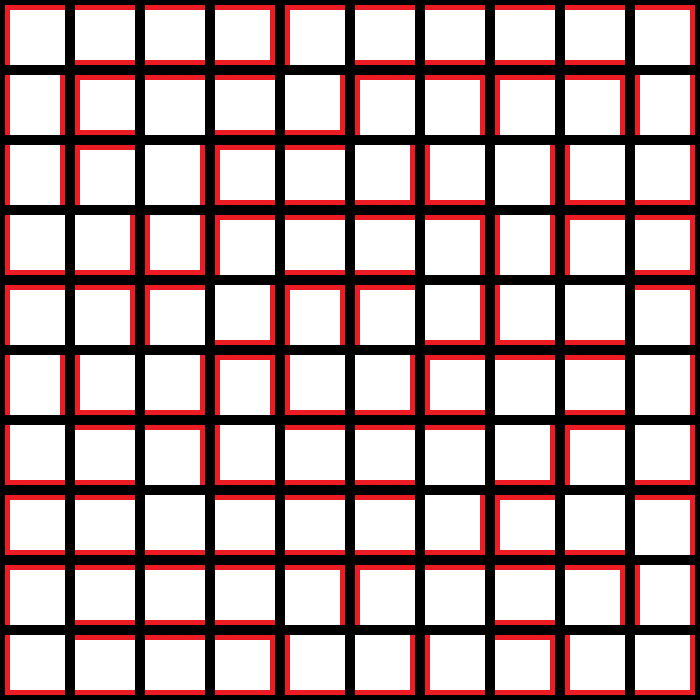

In [235]:
blank_image

In [218]:
blank_image.size

(700, 700)

In [128]:
import uuid

blank_image.save(f'temp/{str(uuid.uuid4())}_{maze_name}.jpg')

In [20]:
#solution_maze1 = [12,13,9,5,4,0,1,2,6,10,11,7,3] #primjer
#solution_maze1 = [142,143,144,129,128,113,114,115,130,145,146,131,116,117,102,101,86,85,70,55,54,69,84,83,98,97,112,111,110,
#                   125,126,141,140,139,138,123,122,107,108,93,94,79,64,65,50,49,48,33,32,17,18,19,34,35,36,37,22,7]#zadatak3

In [248]:
def get_orijent(orijentacija):
    beg = ''
    diff = solution_maze1[0] - solution_maze1[1]
    if diff == -1:
        beg = 'W'
        orijentacija[solution_maze1[0]] = 'WE'
    elif diff == 1:
        beg = 'E'
        orijentacija[solution_maze1[0]] = 'EW'
    elif diff > 1:
        beg = 'S'
        orijentacija[solution_maze1[0]] = 'SN'
    else:
        beg = 'N'
        orijentacija[solution_maze1[0]] = 'NS'
    for pos in range(1, len(solution_maze1) - 1):  #barem 2 elementa
        diff = solution_maze1[pos] - solution_maze1[pos + 1]
        if diff > 1:
            orijentacija[solution_maze1[pos]] = beg + 'N'
            beg = 'S'
        elif diff == 1:
            orijentacija[solution_maze1[pos]] = beg + 'W'
            beg = 'E'
        elif diff == -1:
            orijentacija[solution_maze1[pos]] = beg + 'E'
            beg = 'W'
        else:
            orijentacija[solution_maze1[pos]] = beg + 'S'
            beg = 'N'
    if beg == 'S':
        orijentacija[solution_maze1[-1]] = 'SN'
    elif beg == 'N':
        orijentacija[solution_maze1[-1]] = 'NS'
    elif beg == 'E':
        orijentacija[solution_maze1[-1]] = 'EW'
    else:
        orijentacija[solution_maze1[-1]] = 'WE'
    return orijentacija

In [249]:
orijentacija = {}
get_orijent(orijentacija)

{0: 'WE', 1: 'WE', 2: 'WE', 3: 'WE'}

In [250]:
def get_image(image, orijent, size, path):
    r_h, r_v, k = path
    pom_img = Image.new("RGB", size)
    pom_img.paste(image, (0, 0))
    if orijent == 'EW' or orijent == 'WE':
        pom_img.paste(r_h, (5, 31))
    elif orijent == 'SN' or orijent == 'NS':
        pom_img.paste(r_v, (31, 5))
    elif orijent == 'SE' or orijent == 'ES':
        pom_img.paste(k.rotate(180), (31, 31))
    elif orijent == 'WS' or orijent == 'SW':
        pom_img.paste(k.rotate(90), (5, 31))
    elif orijent == 'WN' or orijent == 'NW':
        pom_img.paste(k, (5, 5))
    elif orijent == 'NE' or orijent == 'EN':
        pom_img.paste(k.rotate(270), (31, 5))
    return pom_img

In [251]:
for i in range(1, 7):
    open_images.append(Image.open(f'maze_parts/{i}.png'))
ravno_hor = Image.open('maze_parts/ravno_hor.png')
ravno_ver = Image.open('maze_parts/ravno_ver.png')
krajevi_hor = Image.open('maze_parts/krajevi_hor.png')
krajevi_ver = Image.open('maze_parts/krajevi_ver.png')
kut = Image.open('maze_parts/kut.png')
width, height = open_images[0].size
blank_image = Image.new("RGB", (width*column, height*row))

for (i, x) in enumerate(maze):
    h = height * i
    for (j, y) in enumerate(x):
        w = width * j
        if y == 'a':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'b':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'c':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'd':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'e':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'f':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'g':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'h':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'i':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'j':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'k':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'l':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'm':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'n':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'o':
            if i*column+j in orijentacija:
                new_img = get_image(find_image(open_images, y), orijentacija[i*column+j], (width, height), (ravno_hor, ravno_ver, kut))
                blank_image.paste(new_img, (w,h))
            else:
                blank_image.paste(find_image(open_images, y), (w, h))
        elif y == 'p':
            blank_image.paste(find_image(open_images, y), (w, h))

beg_image = Image.new('RGB', (width, height))
beg_image.paste(find_image(open_images, maze[solution_maze1[0] // column][solution_maze1[0] % column]))
if orijentacija[solution_maze1[0]] == 'WE':
    beg_image.paste(krajevi_hor.rotate(180), (25, 25))
elif orijentacija[solution_maze1[0]] == 'EW':
    beg_image.paste(krajevi_hor, (5, 25))
elif orijentacija[solution_maze1[0]] == 'SN':
    beg_image.paste(krajevi_ver, (25, 5))
else:
    beg_image.paste(krajevi_ver.rotate(180), (25, 25))
blank_image.paste(beg_image, (width * (solution_maze1[0] % column), height * (solution_maze1[0] // column)))

end_image = Image.new('RGB', (width, height))
end_image.paste(find_image(open_images, maze[solution_maze1[-1] // column][solution_maze1[-1] % column]))
if orijentacija[solution_maze1[-1]] == 'WE':
    end_image.paste(krajevi_hor, (5, 25))
elif orijentacija[solution_maze1[-1]] == 'EW':
    end_image.paste(krajevi_hor.rotate(180), (25, 25))
elif orijentacija[solution_maze1[-1]] == 'SN':
    end_image.paste(krajevi_ver.rotate(180), (25, 25))
else:
    end_image.paste(krajevi_ver, (25, 5))
blank_image.paste(end_image, (width * (solution_maze1[-1] % column), height * (solution_maze1[-1] // column)))

for i in range(6):
    open_images[i].close()
ravno_hor.close()
ravno_ver.close()
kut.close()
krajevi_hor.close()
krajevi_ver.close()

In [252]:
blank_image.save(f'temp/{str(uuid.uuid4())}_{maze_name}_solved.jpg')

In [253]:
import networkx as nx

In [277]:
g=nx.Graph()
g.add_edges_from([(k,i) for k in koordinate.keys() for i in koordinate[k]])
p=nx.drawing.nx_pydot.to_pydot(g)
p.write_png('stablo.png')

True